Tip: hit shift-enter after each Python statement to run it

Import Pandas for data parsing

SciKit Learn is the machine learning framework

In [3]:
import pandas
import graphviz
from sklearn import tree
import numpy as np

In [4]:
import pandas
import graphviz
from sklearn import tree
import numpy as np

Read data from csv file. Just print "raw_data" to see what is inside.

Q: Can you spot the relationship between a number and the class?

In [5]:
raw_data = pandas.read_csv('part1.csv', index_col=None)

raw_data has a number and a class. The goal is that our ML can learn the class for the numbers.

For that, we need to split them. Class goes into one array, the data to learn (a.k.a. "features" in another)

In [6]:
learn_data = raw_data.copy()
classes = raw_data['class']
del learn_data['class']

We use a Decision Tree Classifier

In [7]:
classifier = tree.DecisionTreeClassifier(criterion= 'entropy')

Tell the classifier to learn based on reference data

In [8]:
classifier.fit(learn_data.values, classes)

DecisionTreeClassifier(criterion='entropy')

Now we can see if the system has learned something

In [9]:
classifier.predict([[500,]])

array([1], dtype=int64)

Q: How good are the predictions of numbers between 1 and 100? Do they match your finding of the relationship?

Q: What about other numbers (smaller 1 or larger 100)?

In [10]:
# we create sa sample test of numbers between 51 and 100. 
# predictions should all be ones

test = np.arange(51,100,1)
classifier.predict(test.reshape(-1,1))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1], dtype=int64)

In [11]:
# how abour out-of -range values?

# we create an aray of negative values
test2 = np.arange(-100,0,1)
classifier.predict(test2.reshape(-1,1))

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [12]:
# and an array of positive values greter than 100
test3 = np.arange(100,200,1)
classifier.predict(test3.reshape(-1,1))

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

Q: Can we display the decision tree?

[Text(0.5, 0.75, 'number <= 50.5\nentropy = 1.0\nsamples = 800\nvalue = [406, 394]\nclass = class1'),
 Text(0.25, 0.25, 'entropy = 0.0\nsamples = 406\nvalue = [406, 0]\nclass = class1'),
 Text(0.75, 0.25, 'entropy = 0.0\nsamples = 394\nvalue = [0, 394]\nclass = class2')]

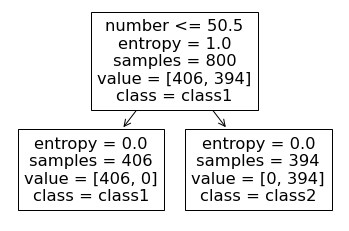

In [17]:
tree.plot_tree(classifier, 
               feature_names=learn_data.columns, class_names=['class1','class2'])


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# a different approach is to split data into trining and test

# Split data into training and test set
features_train, features_test, target_train, target_test = train_test_split(
    learn_data.values, classes, test_size=0.2, random_state=0)

# we run the model again
classifier.fit(features_train, target_train)

# and then we test it with the test set:
classifier.score(features_test, target_test)

print(classification_report(target_test, classifier.predict(features_test)))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00       111
           1       1.00      1.00      1.00        89

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



<AxesSubplot:>

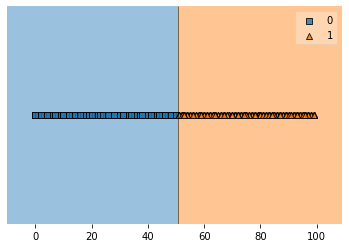

In [21]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
plot_decision_regions(learn_data.values, classes.values, clf = classifier, legend = 1, zoom_factor=0.1)



In [24]:
from sklearn.metrics import confusion_matrix
predict_test = classifier.predict(features_test)
print (confusion_matrix(target_test,predict_test ))

[[111   0]
 [  0  89]]
